In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
used_car_data = pd.read_csv('usedcar.csv')

In [51]:
# Data preprocessing

# Removing non-numeric characters from 'miles' and 'price', and converting to numeric
used_car_data['miles'] = used_car_data['miles'].str.replace(' miles', '').str.replace(',', '').astype(float)
used_car_data['price'] = used_car_data['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Splitting 'color' into 'exterior_color' and 'interior_color'
used_car_data[['exterior_color', 'interior_color']] = used_car_data['color'].str.split(' exterior, ', expand=True)
used_car_data['interior_color'] = used_car_data['interior_color'].str.replace(' interior', '')

# Splitting 'condition' into different features
condition_split = used_car_data['condition'].str.split(', ', expand=True)
used_car_data['accidents_reported'] = condition_split[0]
used_car_data['owners'] = condition_split[1]

# Converting accidents and owners to more usable forms
used_car_data['accident_count'] = used_car_data['accidents_reported'].apply(lambda x: 0 if 'No accidents' in x else 1)
used_car_data['owner_count'] = used_car_data['owners'].str.extract('(\d+)').astype(float)

# Checking for missing values
missing_values = used_car_data.isnull().sum()

# Displaying the processed data and missing values
used_car_data

,name,year,miles,color,condition,price,exterior_color,interior_color,accidents_reported,owners,accident_count,owner_count
0,Kia Forte,2022,41406.0,"Gray exterior, Black interior","No accidents reported, 1 Owner",15988.0,Gray,Black,No accidents reported,1 Owner,0,1.0
1,Chevrolet Silverado 1500,2021,15138.0,"White exterior, Black interior","1 accident reported, 1 Owner",38008.0,White,Black,1 accident reported,1 Owner,1,1.0
2,Toyota RAV4,2022,32879.0,"Silver exterior, Unknown interior","No accidents reported, 1 Owner",24988.0,Silver,Unknown,No accidents reported,1 Owner,0,1.0
3,Honda Civic,2020,37190.0,"Blue exterior, Black interior","No accidents reported, 1 Owner",18998.0,Blue,Black,No accidents reported,1 Owner,0,1.0
4,Honda Civic,2020,27496.0,"Black exterior, Black interior","No accidents reported, 1 Owner",19498.0,Black,Black,No accidents reported,1 Owner,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2835,Ford Escape,2013,98601.0,"Silver exterior, Unknown interior","2 accidents reported, 3 Owners",8995.0,Silver,Unknown,2 accidents reported,3 Owners,1,3.0
2836,Mercedes-Benz R-Class,2009,120694.0,"Black exterior, Black interior","1 accident reported, 3 Owners",9495.0,Black,Black,1 accident reported,3 Owners,1,3.0
2837,Mercedes-Benz GLC,2022,27894.0,"Gray exterior, Gray interior","No accidents reported, 2 Owners",29999.0,Gray,Gray,No accidents reported,2 Owners,0,2.0
2838,Honda CR-V,2021,50220.0,"Gray exterior, Unknown interior","No accidents reported, 1 Owner",22992.0,Gray,Unknown,No accidents reported,1 Owner,0,1.0


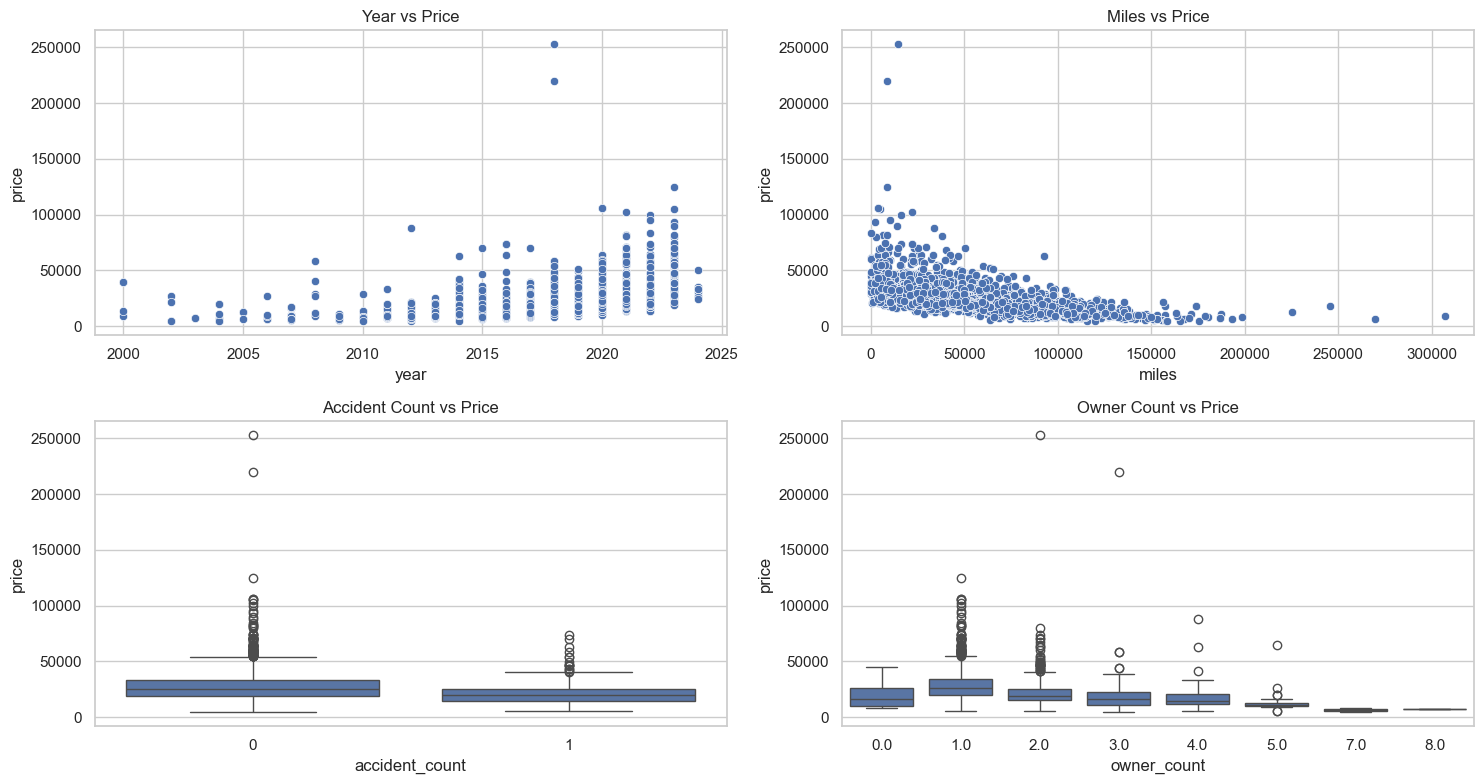

In [57]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a subset of the data for visualization
visualization_data = used_car_data[['year', 'miles', 'exterior_color', 'interior_color', 'accident_count', 'owner_count', 'price']]

# Plotting distributions and relationships
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Year vs Price
sns.scatterplot(data=visualization_data, x='year', y='price', ax=axes[0, 0])
axes[0, 0].set_title('Year vs Price')

# Miles vs Price
sns.scatterplot(data=visualization_data, x='miles', y='price', ax=axes[0, 1])
axes[0, 1].set_title('Miles vs Price')

# Accident Count vs Price
sns.boxplot(data=visualization_data, x='accident_count', y='price', ax=axes[1, 0])
axes[1, 0].set_title('Accident Count vs Price')

# Owner Count vs Price
sns.boxplot(data=visualization_data, x='owner_count', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Owner Count vs Price')

plt.tight_layout()
plt.show()

In [59]:
# Since there are no missing values, we can proceed with the model building
# First, we need to handle categorical data for the model

# For simplicity, let's use one-hot encoding for the categorical variables
categorical_cols = ['exterior_color', 'interior_color', 'accidents_reported', 'owners']
used_car_data_encoded = pd.get_dummies(used_car_data, columns=categorical_cols, drop_first=True)

# Separating the features and the target variable
X = used_car_data_encoded.drop(['name', 'color', 'condition', 'price'], axis=1)
y = used_car_data_encoded['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Displaying the root mean squared error
rmse

9746.481624076152

In [60]:
from sklearn.ensemble import RandomForestRegressor

# Building the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Fitting the model on the training data
rf_model.fit(X_train, y_train)

# Predicting on the test set
rf_y_pred = rf_model.predict(X_test)

# Calculating the mean squared error for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)

# Displaying the root mean squared error for the Random Forest model
rf_rmse


8436.756250524397

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

# Building the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Fitting the model on the training data
gb_model.fit(X_train, y_train)

# Predicting on the test set
gb_y_pred = gb_model.predict(X_test)

# Calculating the mean squared error for the Gradient Boosting model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)

# Displaying the root mean squared error for the Gradient Boosting model
gb_rmse

8951.371109347274

In [62]:
from sklearn.model_selection import GridSearchCV

# Setting up a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [3, 4, 5],           # depth of trees
    'learning_rate': [0.01, 0.1, 0.2] # learning rate
}

# Creating a new Gradient Boosting model for grid search
gb_model_tuned = GradientBoostingRegressor(random_state=42)

# Setting up grid search with cross-validation
grid_search = GridSearchCV(estimator=gb_model_tuned, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fitting grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_

# Best model from grid search
best_gb_model = grid_search.best_estimator_

# Predicting on the test set with the best model
gb_y_pred_best = best_gb_model.predict(X_test)

# Calculating the mean squared error for the best Gradient Boosting model
gb_mse_best = mean_squared_error(y_test, gb_y_pred_best)
gb_rmse_best = np.sqrt(gb_mse_best)

# Displaying the best parameters and RMSE
best_params, gb_rmse_best

Fitting 3 folds for each of 27 candidates, totalling 81 fits


({'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200},
 9109.909864050383)